<a href="https://colab.research.google.com/github/farheen2605/SlashMark_Basic/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

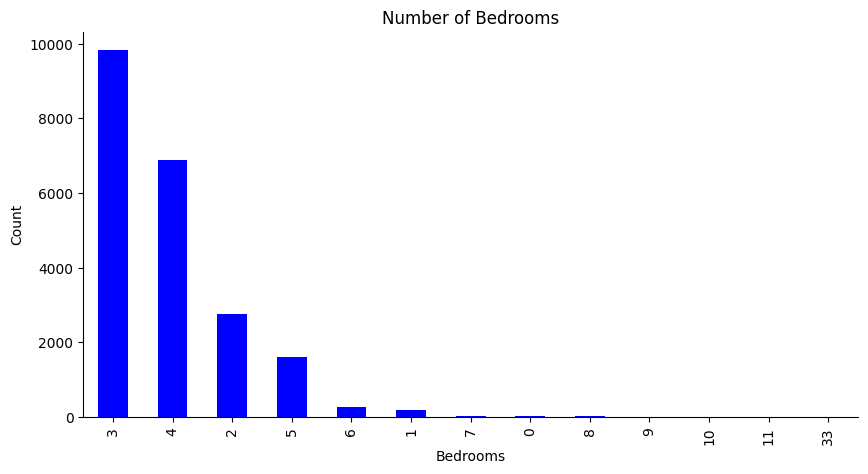

<Figure size 1000x1000 with 0 Axes>

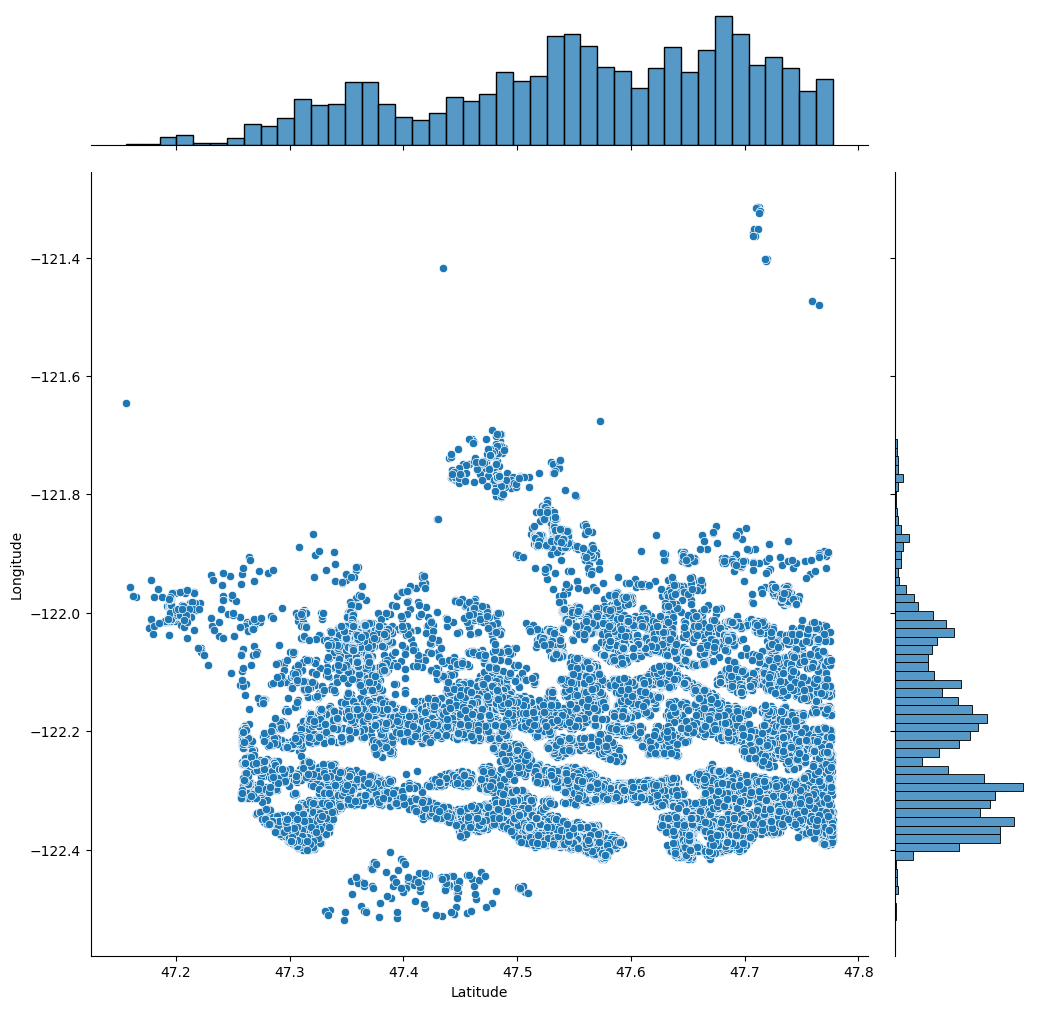

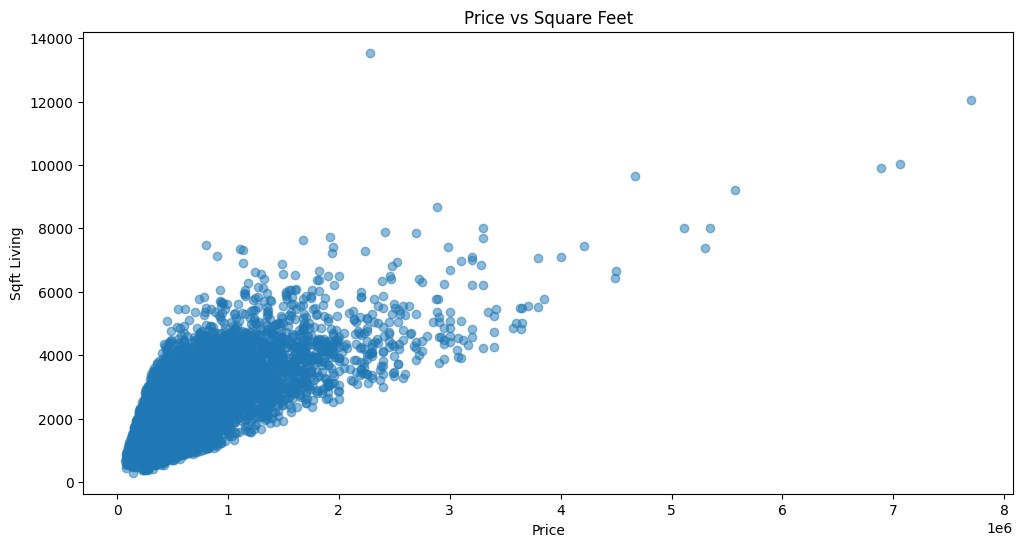

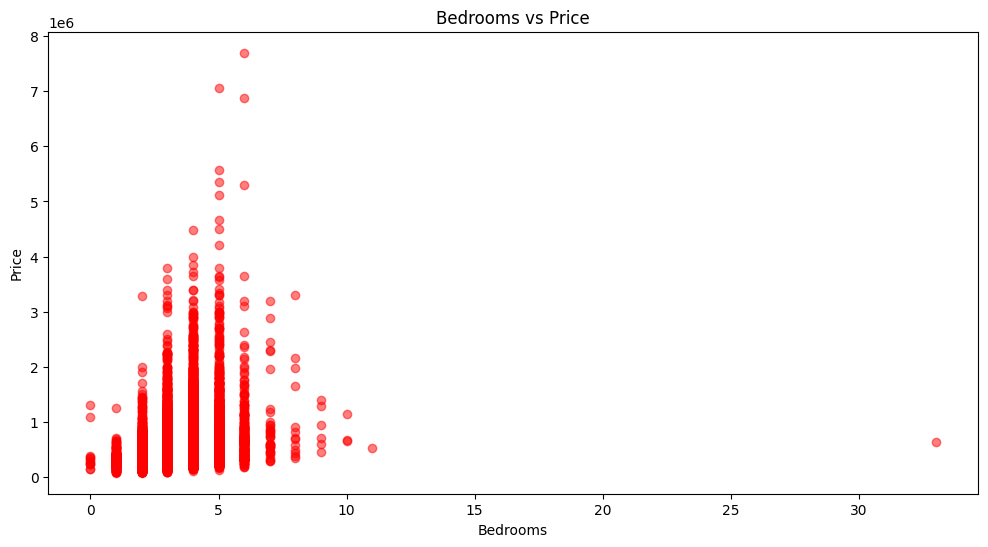

Linear Regression R² Score: 0.7336
Gradient Boosting R² Score: 0.9218


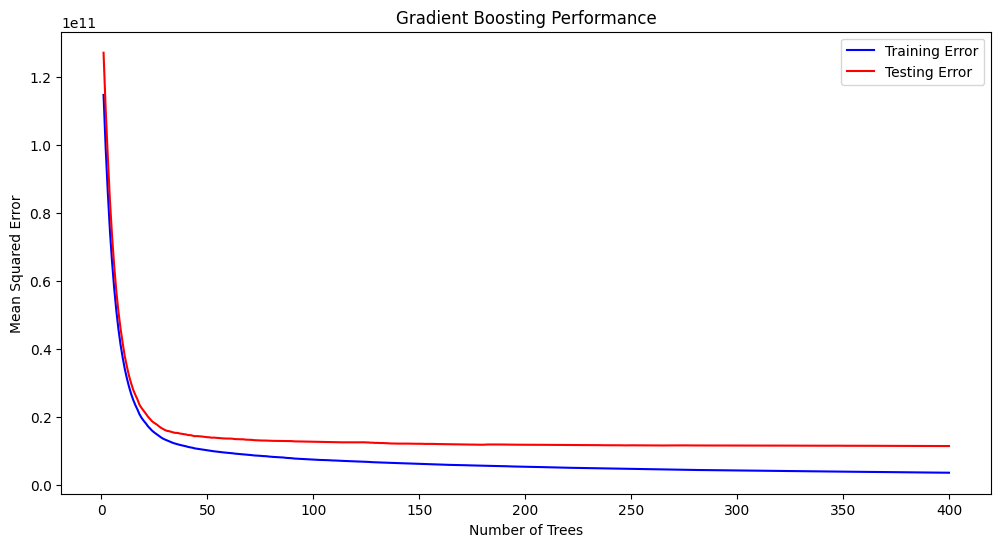

PCA Explained Variance Ratio: [0.2752464  0.11593127 0.0970981  0.07190557 0.06351438 0.05355243
 0.05247657 0.04561652 0.04368482 0.034592  ]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/content/kc_house_data.csv")

# Display first few rows
print(data.head())

# Data summary
print(data.describe())

# Visualizations
plt.figure(figsize=(10, 5))
data['bedrooms'].value_counts().plot(kind='bar', color='blue')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()
plt.show()

# Joint plot of latitude and longitude
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Scatter plots for price relationships
plt.figure(figsize=(12, 6))
plt.scatter(data.price, data.sqft_living, alpha=0.5)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Sqft Living")
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(data.bedrooms, data.price, alpha=0.5, color='red')
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

# Drop unnecessary columns
data['date'] = pd.to_datetime(data['date']).dt.year  # Convert date to year
train1 = data.drop(['id', 'price'], axis=1)

# Target variable
labels = data['price']

# Splitting dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

# Linear Regression Model
reg = LinearRegression()
reg.fit(x_train, y_train)
lr_score = reg.score(x_test, y_test)
print(f"Linear Regression R² Score: {lr_score:.4f}")

# Gradient Boosting Regressor
# clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
#                                          learning_rate=0.1, loss='ls')
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
                                         learning_rate=0.1, loss='squared_error')
clf.fit(x_train, y_train)
gb_score = clf.score(x_test, y_test)
print(f"Gradient Boosting R² Score: {gb_score:.4f}")

# Compute training and testing error
train_score = np.zeros(400, dtype=np.float64)
test_score = np.zeros(400, dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

# Plot training and testing errors
plt.figure(figsize=(12, 6))
plt.plot(np.arange(400) + 1, clf.train_score_, 'b-', label='Training Error')
plt.plot(np.arange(400) + 1, test_score, 'r-', label='Testing Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Performance')
plt.legend()
plt.show()

# PCA for dimensionality reduction
scaler = StandardScaler()
scaled_train1 = scaler.fit_transform(train1)

pca = PCA(n_components=10)  # Keeping top 10 principal components
train_pca = pca.fit_transform(scaled_train1)

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
